In [1]:
# importul bibliotecilor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importul fisierului cu date 'dvertising.csv' descarcat de pe https://www.kaggle.com/bumba5341/advertisingcsv
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# stergerea coloanei 'Unnamed: 0'
df=df.drop('Unnamed: 0', axis = 1)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# 1.  Implementarea regresiei liniare cu instrumente Python

In [6]:
# crearea unei noi coloane "Total_spend" care va fi suma primelor 3 coloane
df['Total_spend'] = df['TV']+df['Radio']+df['Newspaper']

In [7]:
df.head()

,TV,Radio,Newspaper,Sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='Total_spend', ylabel='Sales'>

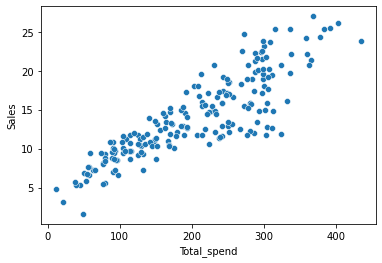

In [8]:
# afisarea depdepndentei dintre Sales si Total_spend
sns.scatterplot(data=df, y='Sales', x='Total_spend')

<AxesSubplot:xlabel='Total_spend', ylabel='Sales'>

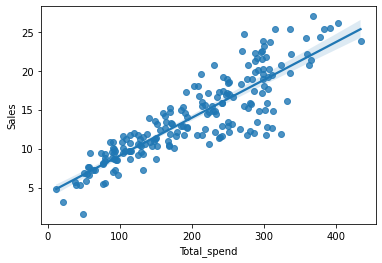

In [9]:
# afisarea depdepndentei dintre Sales si Total_spend si trasare liniei regresiei
sns.regplot(data=df, y='Sales', x='Total_spend')

In [10]:
# separarea in X si y
X=df['Total_spend']
y=df['Sales']

In [11]:
#Determinarea coeficientilor B1 si B0 din relatia y=B1X+B0 cu ajutorul functiei polyfit() considerand parametrul deg=1
B1, B0 = np.polyfit(X,y,deg=1)
B1, B0

(0.04868787931904818, 4.243028216036327)

In [12]:
# crearea unei serii de valori a posibilelor cheltuieli
spend=np.linspace(0,500,100)
spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [13]:
# prezicera vanzarilor pentru posibilele cheltuieli
predict_sales = B1*spend+B0
predict_sales

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

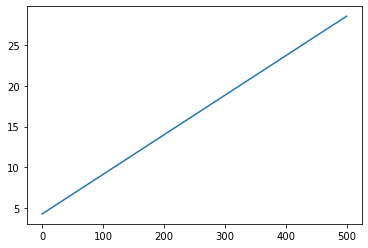

In [14]:
# Afisarea liniara a depdendentei dintre spend si predict_sales
plt.plot(spend, predict_sales)

In [15]:
# reliazarea unei predictii
spend=300
sales=B1*spend+B0
sales

18.84939201175078

# 2. Implementarea regresiei liniare cu instrumente Scikit-Learn

In [16]:
df = df.drop('Total_spend', axis=1)

In [17]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


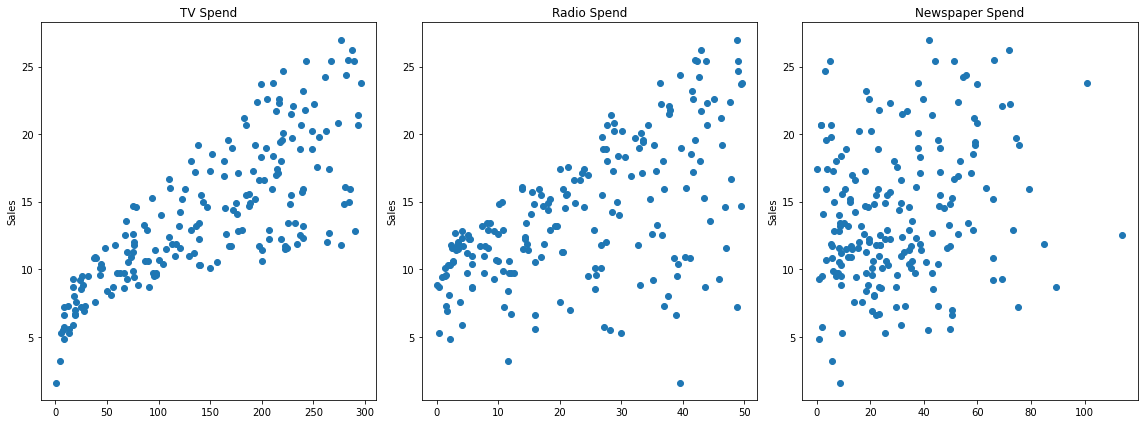

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'],  "o")
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['Radio'], df['Sales'], "o")
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['Newspaper'], df['Sales'], "o")
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

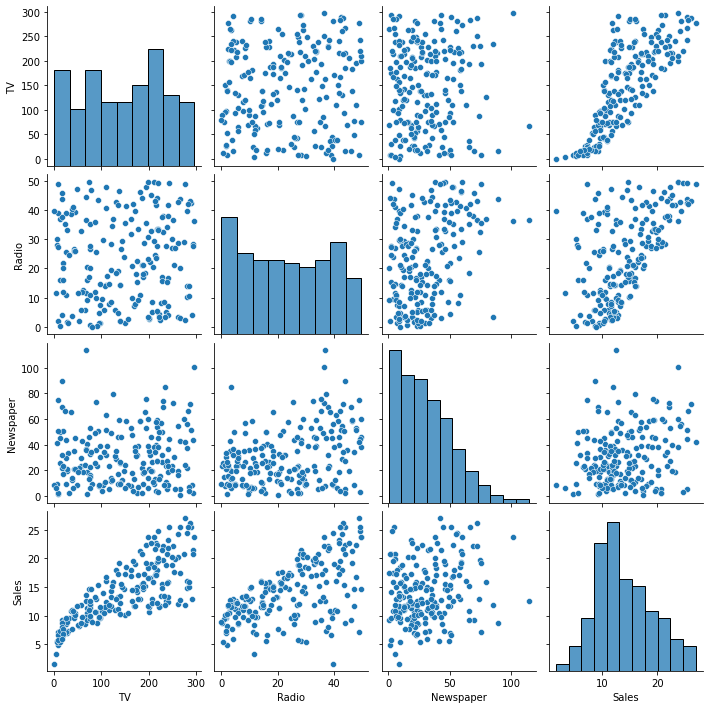

In [19]:
sns.pairplot(df)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

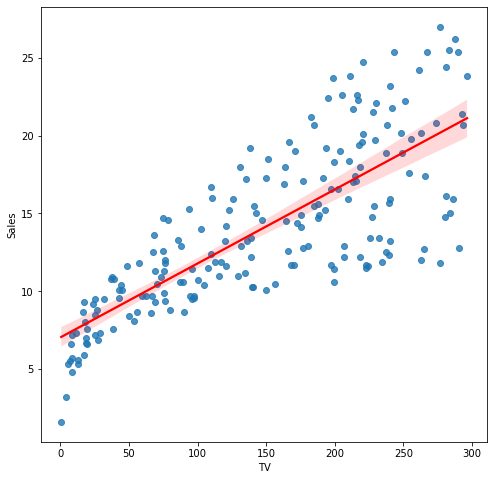

In [20]:
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='TV', y="Sales", line_kws={'color': 'red'})

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

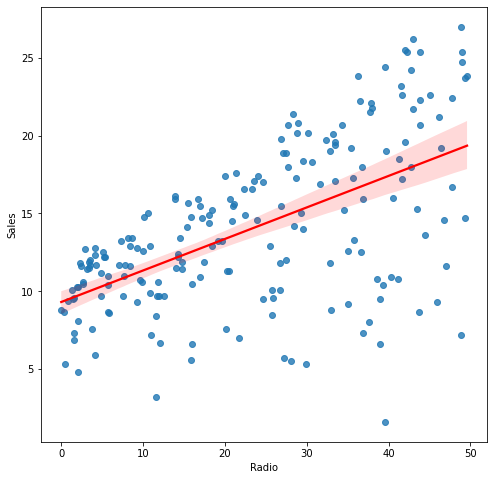

In [21]:
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='Radio', y="Sales", line_kws={'color': 'red'})

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

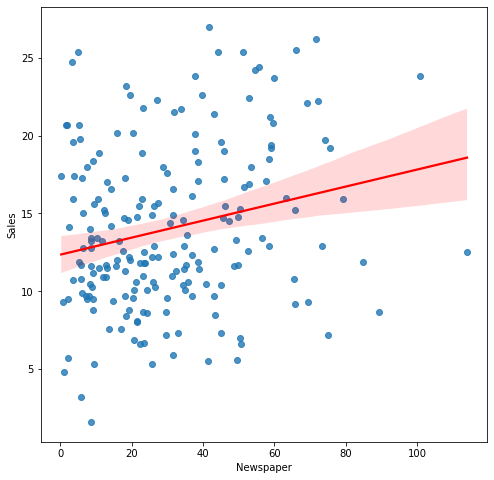

In [22]:
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='Newspaper', y="Sales", line_kws={'color': 'red'})

In [23]:
X=df.drop('Sales', axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
y = df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
predictii = model.predict(X_test)

In [29]:
predictii

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [30]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: Sales, dtype: float64

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predictii)

1.5116692224549084

In [32]:
df['Sales'].mean()

14.022500000000003

In [33]:
mean_squared_error(y_test, predictii)

3.79679723671522

In [34]:
np.sqrt(mean_squared_error(y_test, predictii))

1.9485372043446387

In [35]:
er_rezidual = y_test - predictii

In [36]:
er_rezidual

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: Sales, dtype: float64

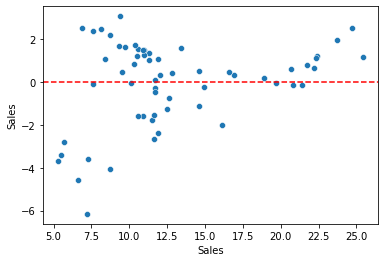

In [37]:
sns.scatterplot(x=y_test, y = er_rezidual)
plt.axhline(y=0, color ='r', ls = '--')

<AxesSubplot:xlabel='Sales', ylabel='Density'>

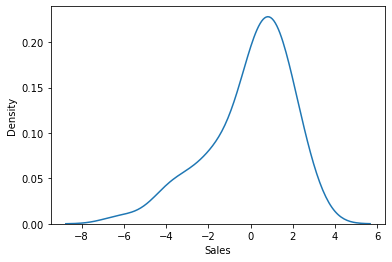

In [38]:
sns.kdeplot(er_rezidual)

In [39]:
final_model = LinearRegression()

In [40]:
final_model.fit(X,y)

LinearRegression()

In [41]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [42]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [43]:
y_pred = final_model.predict(X)

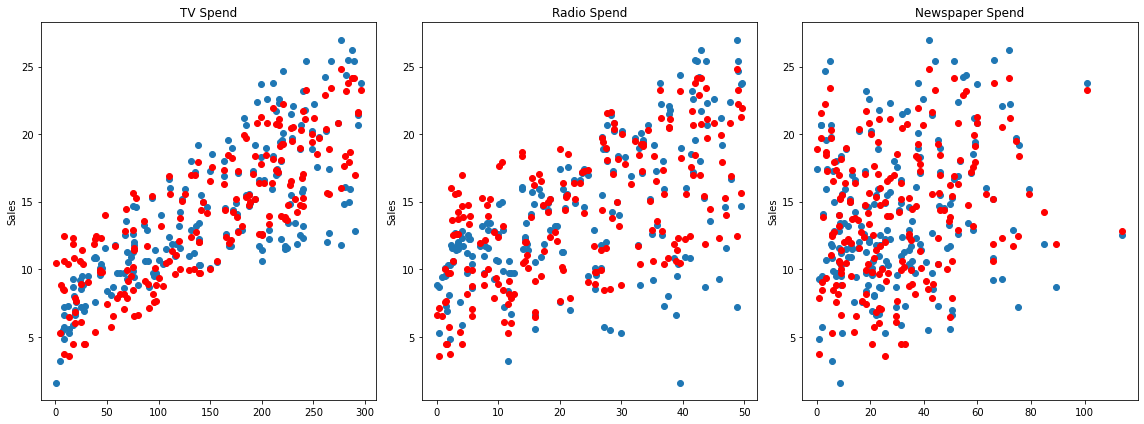

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'],  "o")
axes[0].plot(df['TV'], y_pred,  "o", color="red")
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['Radio'], df['Sales'], "o")
axes[1].plot(df['Radio'], y_pred,  "o", color="red")
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['Newspaper'], df['Sales'], "o")
axes[2].plot(df['Newspaper'], y_pred,  "o", color="red")
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

In [45]:
from joblib import dump, load

In [46]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [47]:
loaded_model = load('final_sales_model.joblib')

In [48]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [49]:
X.shape

(200, 3)

In [50]:
date_proprii = [[23, 56, 41]]

In [51]:
loaded_model.predict(date_proprii)

array([14.50661995])

# 3. Implementarea regresiei polinomiale cu instrumente Scikit-Learn


## 3.1. Implementarea PolynomialFeatures

In [52]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [55]:
poly_features = polynomial_converter.fit_transform(X)
poly_features 

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [56]:
poly_features.shape

(200, 9)

In [57]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

## 3.2. Predictia cu LinearRegression

In [58]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [59]:
model=LinearRegression()

In [60]:
model.fit(X_train,y_train)

LinearRegression()

In [61]:
pred= model.predict(X_test)

In [62]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [63]:
MAE = mean_absolute_error(y_test, pred)

In [64]:
MSE = mean_squared_error(y_test, pred)

In [65]:
RMSE =np.sqrt(MSE)

In [66]:
MAE, RMSE

(0.5905974833808005, 0.7233218473857531)

## 3.3. Gradul optimal al polinomului

In [67]:
train_rmse = []
test_rmse = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    test_pred= model.predict(X_test)
    train_pred= model.predict(X_train)
    
    RMSE_train =np.sqrt(mean_squared_error(y_train, train_pred))
    train_rmse.append(RMSE_train)
    
    RMSE_test =np.sqrt(mean_squared_error(y_test, test_pred))
    test_rmse.append(RMSE_test)

In [68]:
train_rmse

[1.574596830590544,
 0.5950712355838926,
 0.4688758111822088,
 0.3694689701771525,
 0.24382206827180572,
 0.19648825836034903,
 0.42552782227378116,
 0.15738640428123035,
 0.16398293372312847]

In [69]:
test_rmse

[1.948537204344638,
 0.7233218473857531,
 0.5392350985707317,
 1.303226623749492,
 5.946670177318908,
 25.965472629719223,
 634.4709144546548,
 2697.77721830997,
 132859.7463155775]

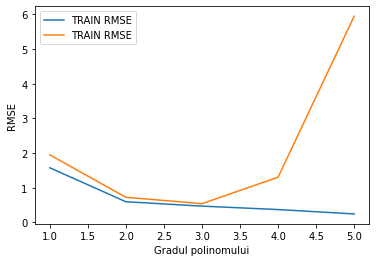

In [70]:
plt.plot(range(1,6), train_rmse[0:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse[0:5], label='TRAIN RMSE')
plt.ylabel('RMSE')
plt.xlabel('Gradul polinomului')
plt.legend()

In [71]:
final_poly_corverter = PolynomialFeatures(degree=3, include_bias=False)

In [72]:
full_converted_X = final_poly_corverter.fit_transform(X)

In [73]:
final_model=LinearRegression()

In [74]:
final_model.fit(full_converted_X,y)

LinearRegression()

In [75]:
dump(final_model, "final_poly_model.joblib")

['final_poly_model.joblib']

In [76]:
dump(final_poly_corverter, "final_converter.joblib")

['final_converter.joblib']

In [77]:
loaded_converter = load("final_converter.joblib")

In [78]:
loaded_model = load('final_poly_model.joblib')

In [79]:
date_proprii = [[23, 56, 41]]

In [80]:
date_proprii_transform = loaded_converter.fit_transform(date_proprii)

In [82]:
date_proprii_transform

array([[2.30000e+01, 5.60000e+01, 4.10000e+01, 5.29000e+02, 1.28800e+03,
        9.43000e+02, 3.13600e+03, 2.29600e+03, 1.68100e+03, 1.21670e+04,
        2.96240e+04, 2.16890e+04, 7.21280e+04, 5.28080e+04, 3.86630e+04,
        1.75616e+05, 1.28576e+05, 9.41360e+04, 6.89210e+04]])

In [81]:
loaded_model.predict(date_proprii_transform)

array([9.2430707])

# 4. Regularizarea
## 4.1. Scalarea datelor - standardizarea

In [85]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [88]:
X.shape

(200, 3)

In [89]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [92]:
poly_features.shape

(200, 19)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [95]:
X_train.shape

(140, 19)

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [98]:
scaler.fit(X_train)

StandardScaler()

In [100]:
X_train = scaler.transform(X_train)

In [101]:
X_test = scaler.transform(X_test)

In [102]:
X_train[0]

array([ 1.53003874, -0.8862929 , -1.16598019,  1.93705409, -0.22476356,
       -0.62651363, -0.90793157, -0.850692  , -0.81317305,  2.23096225,
        0.10749852, -0.35876444, -0.61820397, -0.60530328, -0.5751799 ,
       -0.81381745, -0.72447935, -0.64260728, -0.56741817])

## 4.2. Regresie L2 - Ridge

### 4.2.1. Algoritmul Ridge cu parametrul alpha fix 

In [103]:
from sklearn.linear_model import Ridge

In [104]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Regularization strength; must be a positive float. Regul

In [105]:
ridge_model = Ridge(alpha=10)

In [106]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [108]:
pred = ridge_model.predict(X_test)

In [109]:
MAE = mean_absolute_error(y_test, pred)

In [110]:
MSE = mean_squared_error(y_test, pred)

In [111]:
RMSE =np.sqrt(MSE)

In [112]:
MAE, RMSE

(0.6296591346758599, 0.891632754171089)

In [127]:
ridge_model.coef_

array([ 2.20353886,  0.66215786,  0.02057071,  0.24042926,  1.7547916 ,
        0.33450405,  0.13727496,  0.16067347, -0.02101421, -0.65563883,
        0.47832   , -0.47862424,  0.93589881,  0.1308089 , -0.00265924,
       -0.1562122 , -0.03776377, -0.00677187, -0.02419335])

### 4.2.2. Algoritmul Ridge cu parametrul alpha reglabil

In [113]:
from sklearn.linear_model import RidgeCV

In [119]:
ridge_CV_model = RidgeCV(alphas=(0.1, 1.0, 10), scoring = 'neg_mean_absolute_error')

In [120]:
ridge_CV_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [121]:
ridge_CV_model.alpha_

0.1

In [122]:
pred = ridge_CV_model.predict(X_test)

In [123]:
MAE = mean_absolute_error(y_test, pred)

In [124]:
MSE = mean_squared_error(y_test, pred)

In [125]:
RMSE =np.sqrt(MSE)

In [126]:
MAE, RMSE

(0.4667124113150745, 0.59451366717963)

In [128]:
ridge_CV_model.coef_

array([ 5.90523815,  0.46316396,  0.68028713, -6.17743395,  3.73671928,
       -1.40708382,  0.00624704,  0.11128917, -0.2617823 ,  2.17135744,
       -0.51480159,  0.70587211,  0.60311504, -0.53271216,  0.5716495 ,
       -0.34685826,  0.36744388, -0.03938079, -0.12192939])

In [158]:
ridge_CV_model.best_score_

-0.3977560291681543

## 4.3. Regresie L1 - Lasso

### 4.3.1. Algoritmul Lasso cu parametrul alpha fix 

In [138]:
from sklearn.linear_model import Lasso

In [147]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model._coordinate_descent:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` o

In [148]:
lasso_model = Lasso(alpha=1)

In [151]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [152]:
pred = lasso_model.predict(X_test)

In [153]:
MAE = mean_absolute_error(y_test, pred)

In [154]:
MSE = mean_squared_error(y_test, pred)

In [155]:
RMSE =np.sqrt(MSE)

In [156]:
MAE, RMSE

(1.0633576457243354, 1.4826023115977718)

In [157]:
lasso_model.coef_

array([0.66574769, 0.        , 0.        , 0.        , 3.50386079,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

### 4.3.2. Algoritmul Lasso cu parametrul alpha reglabil

In [159]:
from sklearn.linear_model import LassoCV

In [162]:
lasso_CV_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [163]:
lasso_CV_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [165]:
lasso_CV_model.alpha_

0.0049245318064748715

In [166]:
pred = lasso_CV_model.predict(X_test)

In [167]:
MAE = mean_absolute_error(y_test, pred)

In [168]:
MSE = mean_squared_error(y_test, pred)

In [169]:
RMSE =np.sqrt(MSE)

In [170]:
MAE, RMSE

(0.5123045552899823, 0.6308043049172876)

In [171]:
lasso_CV_model.coef_

array([ 5.15048089,  0.4274257 ,  0.29684446, -4.53337994,  3.38937185,
       -0.4288993 ,  0.        ,  0.        ,  0.        ,  1.17891049,
       -0.        ,  0.        ,  0.16706037, -0.        ,  0.        ,
        0.        ,  0.11083672,  0.        ,  0.06155549])

## 4.4. Regresie L1+L2 - ElasticNet
### 4.4.1. Algoritmul Lasso cu parametrii alpha si l1_ratio ficsi


In [173]:
from sklearn.linear_model import ElasticNet

In [174]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R packa

In [176]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [177]:
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [178]:
pred = elasticnet_model.predict(X_test)

In [179]:
MAE = mean_absolute_error(y_test, pred)

In [180]:
MSE = mean_squared_error(y_test, pred)

In [181]:
RMSE =np.sqrt(MSE)

In [182]:
MAE, RMSE

(1.2175126332217798, 1.6865065155704049)

In [183]:
elasticnet_model.coef_

array([0.88889213, 0.33791231, 0.        , 0.34854326, 1.106399  ,
       0.05523197, 0.16728156, 0.        , 0.        , 0.00113275,
       0.70637146, 0.        , 0.78302792, 0.18044444, 0.        ,
       0.03949557, 0.        , 0.        , 0.        ])

### 4.4.2. Algoritmul Lasso cu parametrii alpha si l1_ratio reglabili

In [184]:
from sklearn.linear_model import ElasticNetCV

In [185]:
elasticnet_CV_model=ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [186]:
elasticnet_CV_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=1000000)

In [187]:
elasticnet_CV_model.alpha_

0.0049245318064748715

In [188]:
elasticnet_CV_model.l1_ratio_

1.0

In [189]:
pred = elasticnet_CV_model.predict(X_test)

In [190]:
MAE = mean_absolute_error(y_test, pred)

In [191]:
MSE = mean_squared_error(y_test, pred)

In [192]:
RMSE =np.sqrt(MSE)

In [193]:
MAE, RMSE

(0.5123045552899823, 0.6308043049172876)

In [194]:
elasticnet_CV_model.coef_

array([ 5.15048089,  0.4274257 ,  0.29684446, -4.53337994,  3.38937185,
       -0.4288993 ,  0.        ,  0.        ,  0.        ,  1.17891049,
       -0.        ,  0.        ,  0.16706037, -0.        ,  0.        ,
        0.        ,  0.11083672,  0.        ,  0.06155549])